In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
mre = pd.read_csv("/Users/zoebjamal/Desktop/DataRes/team-octagoners/Data Source/most-recent-event.csv")
um = pd.read_csv("/Users/zoebjamal/Desktop/DataRes/team-octagoners/Data Source/ufc-master.csv")
ue = pd.read_csv("/Users/zoebjamal/Desktop/DataRes/team-octagoners/Data Source/upcoming-event.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
um

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Dustin Poirier,Conor McGregor,250,-305,250.000000,32.786885,1/23/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dan Hooker,Michael Chandler,-134,105,74.626866,105.000000,1/23/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jessica Eye,Joanne Calderwood,-105,-117,95.238095,85.470085,1/23/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andrew Sanchez,Makhmud Muradov,115,-143,115.000000,69.930070,1/23/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Marina Rodriguez,Amanda Ribas,250,-335,250.000000,29.850746,1/23/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4553,Duane Ludwig,Darren Elkins,-155,135,64.516129,135.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,0.0,2.0,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4554,John Howard,Daniel Roberts,-210,175,47.619048,175.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,1.0,1.0,1.00,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4555,Brendan Schaub,Chase Gormley,-260,220,38.461538,220.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4556,Mike Pierce,Julio Paulino,-420,335,23.809524,335.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,10.0,0.0,0.60,0.0,0.0,0.0,6.0,0.0,0.0,0.0


In [7]:
kn_red = um['R_fighter'] == 'Khabib Nurmagomedov'
kn_blue = um['B_fighter'] == 'Khabib Nurmagomedov'
khabib = um[kn_red | kn_blue]
khabib

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
115,Khabib Nurmagomedov,Justin Gaethje,-315,255,31.746032,255.000000,10/24/2020,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580,Khabib Nurmagomedov,Dustin Poirier,-400,325,25.000000,325.000000,9/7/2019,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1114,Khabib Nurmagomedov,Conor McGregor,-190,165,52.631579,165.000000,10/6/2018,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1351,Khabib Nurmagomedov,Al Iaquinta,-640,470,15.625000,470.000000,4/7/2018,"Brooklyn, New York, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1464,Khabib Nurmagomedov,Edson Barboza,-410,330,24.390244,330.000000,12/30/2017,"Las Vegas, Nevada, USA",USA,Red,...,13.0,0.0,0.30,0.00,0.0,0.0,4.0,0.0,0.0,0.0
2003,Khabib Nurmagomedov,Michael Johnson,-345,285,28.985507,285.000000,11/12/2016,"New York City, New York, USA",USA,Red,...,6.0,0.0,0.33,0.00,1.0,1.0,6.0,0.0,0.0,0.0
2265,Khabib Nurmagomedov,Darrell Horcher,-1000,650,10.000000,650.000000,4/16/2016,"Tampa, Florida, USA",USA,Red,...,3.0,0.0,0.66,0.00,0.0,0.0,7.0,0.0,0.0,0.0
3209,Rafael Dos Anjos,Khabib Nurmagomedov,275,-305,275.000000,32.786885,4/19/2014,"Orlando, Florida, USA",USA,Blue,...,1.0,12.0,0.00,0.50,0.0,0.0,0.0,6.0,0.0,0.0
3457,Pat Healy,Khabib Nurmagomedov,245,-265,245.000000,37.735849,9/21/2013,"Toronto, Ontario, Canada",Canada,Blue,...,2.0,11.0,0.00,0.45,0.0,0.0,0.0,4.0,0.0,0.0
3579,Khabib Nurmagomedov,Abel Trujillo,-305,275,32.786885,275.000000,5/25/2013,"Las Vegas, Nevada, USA",USA,Red,...,27.0,1.0,0.77,1.00,2.0,0.0,3.0,1.0,0.0,0.0


In [8]:
khabib[['total_fight_time_secs']]

,total_fight_time_secs
115,NaN
580,726.0
1114,1083.0
1351,1500.0
1464,900.0
2003,751.0
2265,518.0
3209,900.0
3457,900.0
3579,900.0


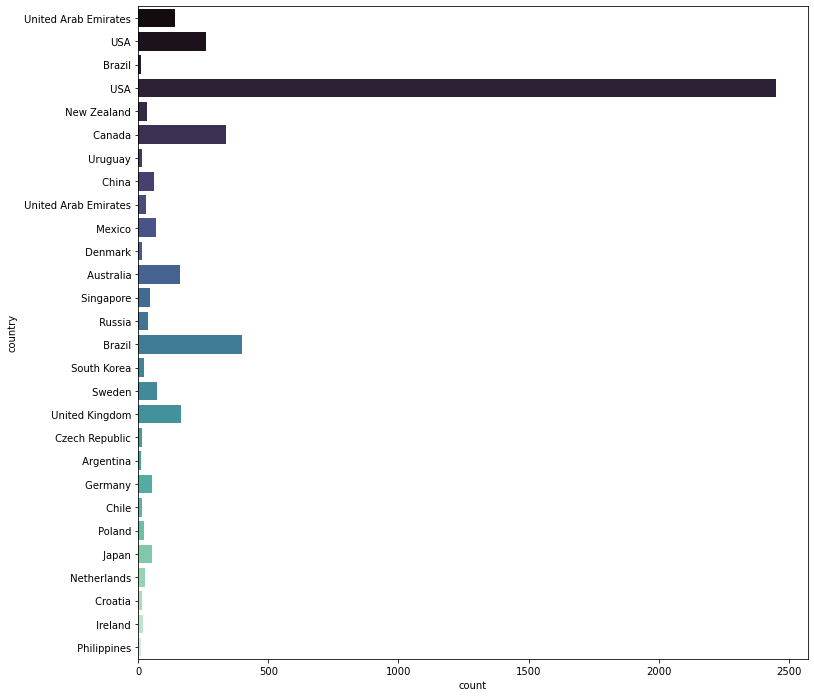

In [9]:
fig, ax = plt.subplots(figsize = (12, 12))

sns.countplot(ax = ax, y = 'country', data = um, palette = "mako")
fig.savefig("number_of_events_per_country.png")

In [44]:
male = um['gender'] == 'MALE'
female = um['gender'] == 'FEMALE'
udec = um['finish'] == 'U-DEC'
sub = um['finish'] == 'SUB'
sdec = um['finish'] == 'S-DEC'
kotko = um['finish'] == 'KO/TKA'
mdec =  um['finish'] == 'M-DEC'
dq = um['finish'] == 'DQ'
overturned = um['finish'] == 'Overturned'
nas = um['finish'].isna()
um[np.invert(nas)]

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
203,Anthony Smith,Aleksandar Rakic,225,-278,225.000000,35.971223,8/29/2020,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,Robbie Lawler,Neil Magny,200,-250,200.000000,40.000000,8/29/2020,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,Ji Yeon Kim,Alexa Grasso,230,-315,230.000000,31.746032,8/29/2020,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,Ricardo Lamas,Bill Algeo,-335,240,29.850746,240.000000,8/29/2020,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,Maki Pitolo,Impa Kasanganay,115,-139,115.000000,71.942446,8/29/2020,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4553,Duane Ludwig,Darren Elkins,-155,135,64.516129,135.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,0.0,2.0,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4554,John Howard,Daniel Roberts,-210,175,47.619048,175.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,1.0,1.0,1.00,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4555,Brendan Schaub,Chase Gormley,-260,220,38.461538,220.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4556,Mike Pierce,Julio Paulino,-420,335,23.809524,335.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,10.0,0.0,0.60,0.0,0.0,0.0,6.0,0.0,0.0,0.0


In [ ]:
finish_percents = 

<AxesSubplot:xlabel='count', ylabel='finish'>

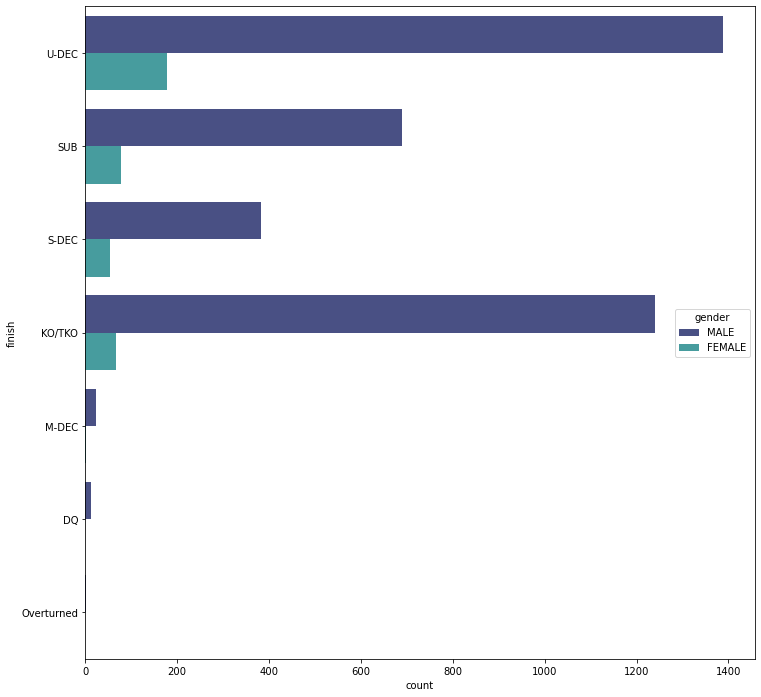

In [10]:
fig, ax = plt.subplots(figsize = (12, 12))

sns.countplot(ax = ax, y = 'finish', data = um, palette = "mako", hue = 'gender')